1. scatterplots with trendlines of election results verus census data a-la
https://fivethirtyeight.com/features/where-trump-got-his-edge/

2. a regression with like 3 or 4 variables
    - education (some college or higher vs not)
    - gender (men vs woman)
    - race (white vs nonwhite %)
    - income

In [1]:
# Inline Chart Parameters
%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

# Ignore warnings, because why not... (this is probably bad)
import warnings
warnings.filterwarnings('ignore')

# R imports
%load_ext rpy2.ipython

# Python Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import us

In [2]:
%%R

smartRequire <- function(pkg) {
  if (!require(pkg, character.only = T)) { install.packages(pkg, repos='http://cran.us.r-project.org') }
  require(pkg, character.only = T)
}

libs <- c("ggplot2", "theme538", "readr", "extrafont", "Cairo")
lapply(libs, smartRequire)
sprintf("Successfully loaded: %s", libs)


[1] "Successfully loaded: ggplot2"   "Successfully loaded: theme538" 
[3] "Successfully loaded: readr"     "Successfully loaded: extrafont"
[5] "Successfully loaded: Cairo"    


In [3]:
df = pd.read_csv('pres_results_by_cd.csv')
df['m'] = df['Clinton'] - df['Trump']
df['state'] = df.ST.apply(lambda x: us.states.lookup(x).name)
df.head()

,Congressional Dist.,ST,CD,ST_ID,CD_ID,FIPS,Total Vote,Margin,Margin (%),Clinton,Trump,Johnson,Stein,McMullin,Fuente,Castle,m,state
0,District 1,AL,1,1,901,1001,"305,940","89,270",29.18,33.79,62.96,2.01,0.43,0.0,0.0,0.0,-29.17,Alabama
1,District 2,AL,2,1,902,1002,"287,872","91,204",31.68,32.76,64.44,1.68,0.36,0.0,0.0,0.0,-31.68,Alabama
2,District 3,AL,3,1,903,1003,"291,317","95,175",32.67,32.03,64.70,1.98,0.42,0.0,0.0,0.0,-32.67,Alabama
3,District 4,AL,4,1,904,1004,"293,046","182,940",62.43,17.31,79.74,1.79,0.37,0.0,0.0,0.0,-62.43,Alabama
4,District 5,AL,5,1,905,1005,"314,750","103,411",32.85,30.87,63.72,3.25,0.63,0.0,0.0,0.0,-32.85,Alabama


In [4]:
df = df[['state','ST','CD','m']]
edu_df = pd.read_csv('census/education.csv')
edu_df = edu_df[['state','district','bachelor_degree_or_higher']]
df = df.merge(edu_df, left_on=('state','CD'), right_on=('state','district'), copy=False)

race_df = pd.read_csv('census/race.csv')
race_df = race_df[['state','district','white']]
df = df.merge(race_df, on=('state','district'), copy=False)

sex_df = pd.read_csv('census/sex.csv')
sex_df = sex_df[['state','district','male']]
df = df.merge(sex_df, on=('state','district'), copy=False)

income_df = pd.read_csv('census/income.csv')
income_df = income_df[['state','district','per_capita']]
df = df.merge(income_df, on=('state','district'), copy=False)

df.head()

,state,ST,CD,m,district,bachelor_degree_or_higher,white,male,per_capita
0,Alabama,AL,1,-29.17,1,24.04,65.46,48.09,25695.0
1,Alabama,AL,2,-31.68,2,21.79,61.26,48.78,24161.0
2,Alabama,AL,3,-32.67,3,22.77,67.79,48.61,24132.0
3,Alabama,AL,4,-62.43,4,17.03,83.31,48.93,22320.0
4,Alabama,AL,5,-32.85,5,30.27,72.64,49.26,29758.0


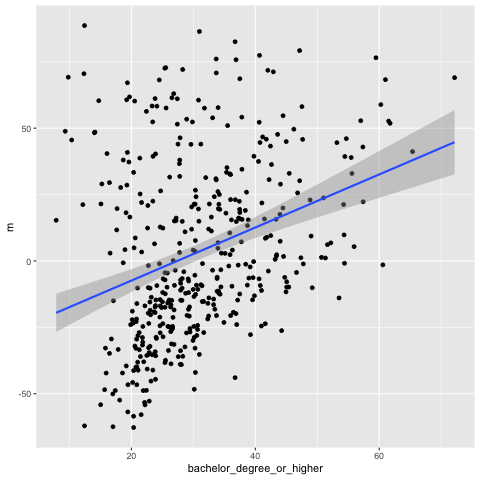

In [5]:
%%R -i df

ggplot(df, aes(x=bachelor_degree_or_higher, y=m)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)


In [6]:
%%R -i df

# Linear Regression 
fit <- lm(m ~ bachelor_degree_or_higher, data=df)
summary(fit)


Call:
lm(formula = m ~ bachelor_degree_or_higher, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.696 -23.826  -9.293  18.786 103.597 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -27.3772     4.7259  -5.793 1.35e-08 ***
bachelor_degree_or_higher   0.9992     0.1447   6.907 1.81e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.77 on 426 degrees of freedom
Multiple R-squared:  0.1007,	Adjusted R-squared:  0.09859 
F-statistic:  47.7 on 1 and 426 DF,  p-value: 1.811e-11



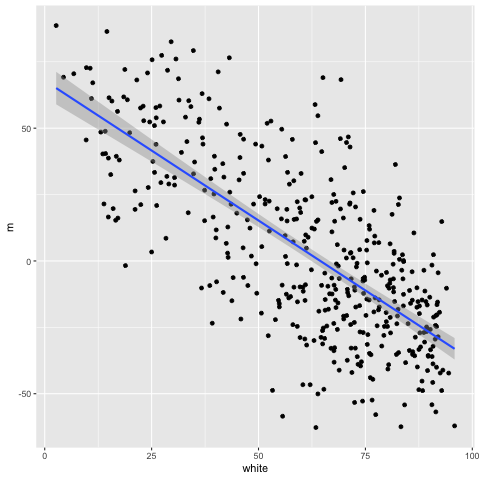

In [7]:
%%R -i df

ggplot(df, aes(x=white, y=m)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)


In [8]:
%%R -i df

# Linear Regression 
fit <- lm(m ~ white, data=df)
summary(fit)


Call:
lm(formula = m ~ white, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.772 -16.051  -0.259  13.992  73.372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  67.9229     3.2419   20.95   <2e-16 ***
white        -1.0538     0.0497  -21.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.37 on 426 degrees of freedom
Multiple R-squared:  0.5135,	Adjusted R-squared:  0.5123 
F-statistic: 449.6 on 1 and 426 DF,  p-value: < 2.2e-16



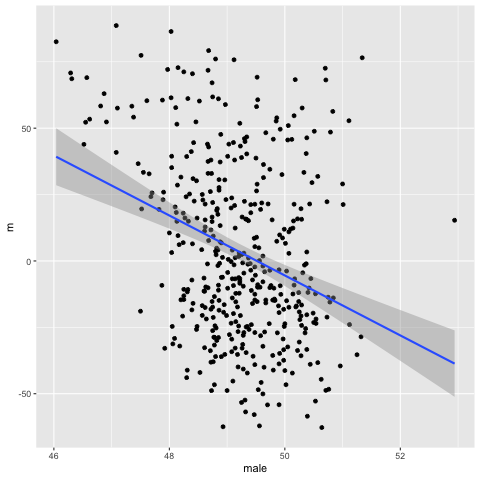

In [9]:
%%R -i df

ggplot(df, aes(x=male, y=m)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)


In [10]:
%%R -i df

# Linear Regression 
fit <- lm(m ~ male, data=df)
summary(fit)


Call:
lm(formula = m ~ male, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.047 -25.000  -4.096  20.051  97.114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  559.080     81.428   6.866 2.35e-11 ***
male         -11.291      1.655  -6.824 3.05e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.81 on 426 degrees of freedom
Multiple R-squared:  0.09855,	Adjusted R-squared:  0.09643 
F-statistic: 46.57 on 1 and 426 DF,  p-value: 3.049e-11



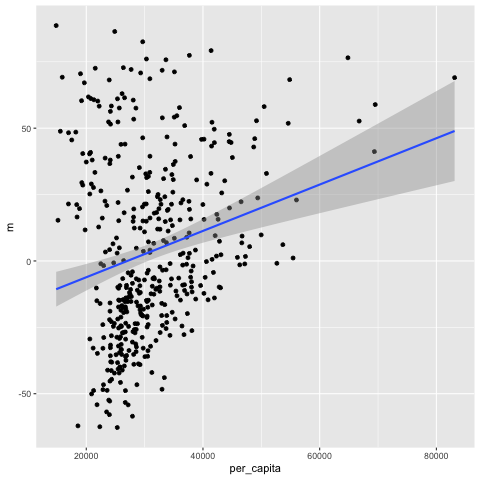

In [11]:
%%R -i df

ggplot(df, aes(x=per_capita, y=m)) +
  geom_point() +
  geom_smooth(method='lm',formula=y~x)

In [12]:
%%R -i df

# Linear Regression 
fit <- lm(m ~ per_capita, data=df)
summary(fit)


Call:
lm(formula = m ~ per_capita, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-61.23 -23.76  -9.44  22.11  99.28 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.359e+01  5.848e+00  -4.034 6.49e-05 ***
per_capita   8.726e-04  1.814e-04   4.810 2.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.63 on 426 degrees of freedom
Multiple R-squared:  0.05151,	Adjusted R-squared:  0.04928 
F-statistic: 23.14 on 1 and 426 DF,  p-value: 2.099e-06



In [13]:
%%R -i df

# Multiple Linear Regression Example 
fit <- lm(m ~ bachelor_degree_or_higher + white + male + per_capita, data=df)
summary(fit) # show results


Call:
lm(formula = m ~ bachelor_degree_or_higher + white + male + per_capita, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.140 -12.499   0.482  14.465  44.937 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2.739e+02  5.104e+01   5.367 1.33e-07 ***
bachelor_degree_or_higher  9.798e-01  2.335e-01   4.196 3.31e-05 ***
white                     -1.064e+00  4.292e-02 -24.799  < 2e-16 ***
male                      -4.901e+00  1.039e+00  -4.719 3.23e-06 ***
per_capita                 1.790e-04  2.861e-04   0.626    0.532    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.29 on 423 degrees of freedom
Multiple R-squared:  0.6707,	Adjusted R-squared:  0.6676 
F-statistic: 215.4 on 4 and 423 DF,  p-value: < 2.2e-16

